# Plot spectra of frift scan file

- to check what channel/frequency range to use

In [3]:
import casacore.tables as pt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import cmath
from astropy import  units as u
import pandas as pd

In [86]:
task_id = '200924167_raw'
task_id_aaf = '200924167_aaf'
data_location = '/tank/apertif/driftscans/210205042/'
msfile = 'WSRTA210205042_B004.MS'

In [87]:
t = pt.taql('select TIME, gmeans(abs(DATA[,0])) from {}{} where ANTENNA1==ANTENNA2 GROUP BY TIME'.format(data_location, msfile))


In [77]:
len(t)

141

In [78]:
channels = range(len(t[0]['Col_2']))

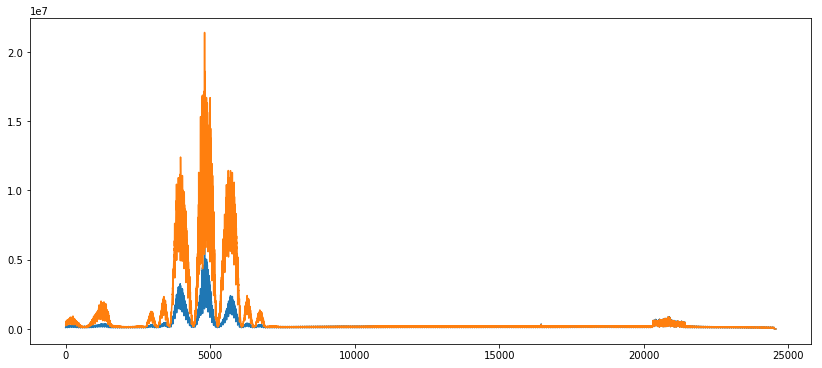

In [79]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(111)
ax.plot(channels, abs(t[30]['Col_2']))
ax.plot(channels, abs(t[10]['Col_2']))

In [88]:
amp = []
for i in range(len(t)):
    amp.append(np.average(t[i]['Col_2'][6500:24500]))

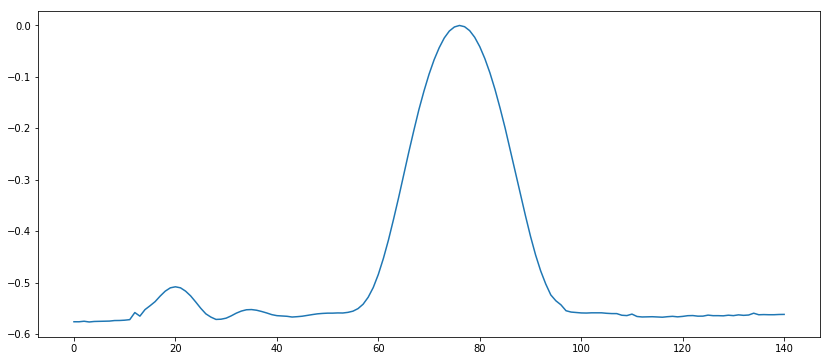

In [89]:
fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(111)
ax.plot(range(len(amp)), np.log10(amp/np.max(amp)))